In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize

In [102]:
# Download the dataset
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

1


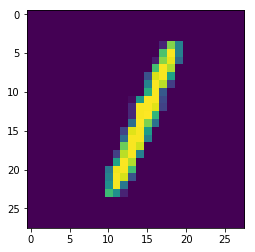

In [6]:
# View example digit
index = np.random.randint(0,60000)
plt.imshow(x_train[index])
print(y_train[index])

Given a 28 x 28 image of a hand written digit write a program that recognizes the digit.

Challenge 1: Don't use ML

Challenge 2: Use an ML algorithm other than NN

Challenge 3: Use a fully-connected NN

Challenge 4: Use a CNN

In [87]:
x_train = x_train.reshape(-1,784)
x_test = x_test.reshape(-1,784)

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
# Training
model = RandomForestClassifier()
model.fit(x_train, y_train)

/Users/alican/.virtualenvs/ml/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [90]:
predictions = model.predict(x_test)
acc = np.sum(predictions==y_test)/y_test.shape[0]
print("Accuracy:", np.round(acc,2))

Accuracy: 0.95


In [100]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, Flatten, MaxPooling2D

In [113]:
model = Sequential()
model.add(Conv2D(30,(3,3),padding='same',activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(30,(3,3),padding='same',activation='relu'))
model.add(Conv2D(10,(3,3),padding='same',activation='relu'))
model.add(Conv2D(1,(3,3),padding='same',activation='relu'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 28, 28, 30)        300       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 28, 28, 30)        8130      
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 28, 28, 10)        2710      
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 28, 28, 1)         91        
Total params: 11,231
Trainable params: 11,231
Non-trainable params: 0
_________________________________________________________________


In [80]:
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(28*28,)))
model.add(Dropout(0.8))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 50)                39250     
_________________________________________________________________
dropout_7 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_36 (Dense)             (None, 50)                2550      
_________________________________________________________________
dropout_8 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


In [23]:
y_test.shape

(10000,)

In [22]:
from sklearn.preprocessing import LabelBinarizer

In [104]:
lb = LabelBinarizer()
lb.fit(y_test)
y_test = lb.transform(y_test)
y_train = lb.transform(y_train)

In [27]:
y_train.shape

(60000, 10)

In [108]:
from keras.optimizers import Adam

opt = Adam()

model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])

In [109]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [110]:
H3 = model.fit(x_train/255, y_train, epochs=20, validation_data=(x_test/255, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 150s 3ms/step - loss: 0.1521 - acc: 0.9546 - val_loss: 0.0576 - val_acc: 0.9811
Epoch 2/20
60000/60000 [==============================] - 150s 3ms/step - loss: 0.0538 - acc: 0.9832 - val_loss: 0.0594 - val_acc: 0.9802
Epoch 3/20
60000/60000 [==============================] - 148s 2ms/step - loss: 0.0381 - acc: 0.9881 - val_loss: 0.0398 - val_acc: 0.9865
Epoch 4/20
15008/60000 [======>.......................] - ETA: 1:47 - loss: 0.0272 - acc: 0.9924

KeyboardInterrupt: 

In [64]:
H.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

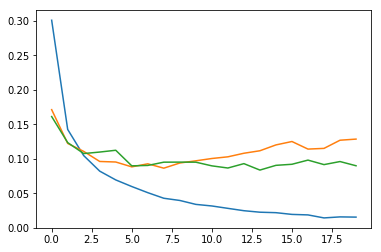

In [74]:
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.plot(H2.history['val_loss'])

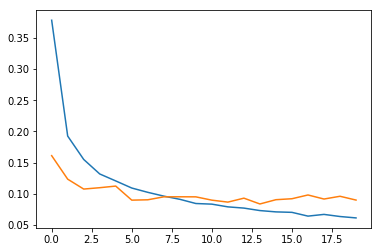

In [73]:
plt.plot(H2.history['loss'])
plt.plot(H2.history['val_loss'])

In [58]:
ii = 1
model.predict(x_test[ii].reshape(1,-1))

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

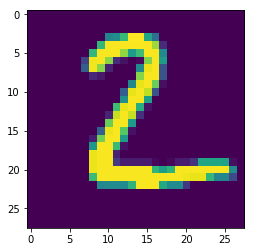

In [59]:
plt.imshow(x_test[ii].reshape(28,28))

In [55]:
x_test[3].reshape(1,-1)

(784,)

In [57]:
x_test[3:4].shape

(1, 784)

In [ ]:
model.save()

In [ ]:
x_train.shape

In [ ]:
from keras.layers import Dense, Activation
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(Dense(100, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

In [ ]:
y_train.shape

In [ ]:
y_train[0]

In [ ]:
from sklearn.preprocessing import LabelBinarizer

In [ ]:
lb = LabelBinarizer()
lb.fit(y_train)

In [ ]:
y_train = lb.transform(y_train)
y_test = lb.transform(y_test)

In [ ]:
y_train.shape

In [ ]:
y_train[0]

In [ ]:
from keras.optimizers import SGD
opt = SGD(lr=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [ ]:
model.fit(x_train, y_train, epochs = 5, validation_data=(x_test, y_test))

In [ ]:
np.max(x_train)

In [ ]:
np.min(x_train)

In [ ]:
(x_train - np.min(x_train))/(np.max(x_train)-np.min(x_train))

In [ ]:
df = pd.read_excel('/content/test.xlsx')